## 🚨 🚥 🚦 🚧  Traffic Speed Prediction

Given *data about traffic at different times*, let's try to predict the **speed of traffic** at a given time.

We will use various regression models to make our predictions.

Data source: https://www.kaggle.com/datasets/vietexob/pgh-traffic-prediction?

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('pgh_train.csv')
data

,from.x,from.y,to.x,to.y,speed,time,is.weekday
0,-80.010193,40.439438,-80.009608,40.439757,27.603437,8,1
1,-79.975452,40.435881,-79.966978,40.435817,53.779673,8,1
2,-79.926506,40.427954,-79.911553,40.425766,39.520281,8,1
3,-80.010193,40.439438,-80.000976,40.436302,24.878792,8,1
4,-80.007891,40.448433,-80.004527,40.449137,41.973019,8,1
...,...,...,...,...,...,...,...
565,-79.895381,40.425906,-79.892002,40.427876,51.251842,20,0
566,-79.895487,40.426092,-79.891258,40.427202,38.864311,20,0
567,-79.895487,40.426092,-79.891258,40.427202,46.044388,20,0
568,-79.926933,40.426905,-79.927907,40.427623,23.390307,20,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   from.x      570 non-null    float64
 1   from.y      570 non-null    float64
 2   to.x        570 non-null    float64
 3   to.y        570 non-null    float64
 4   speed       570 non-null    float64
 5   time        570 non-null    int64  
 6   is.weekday  570 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 31.3 KB


### Visualizing Correlations

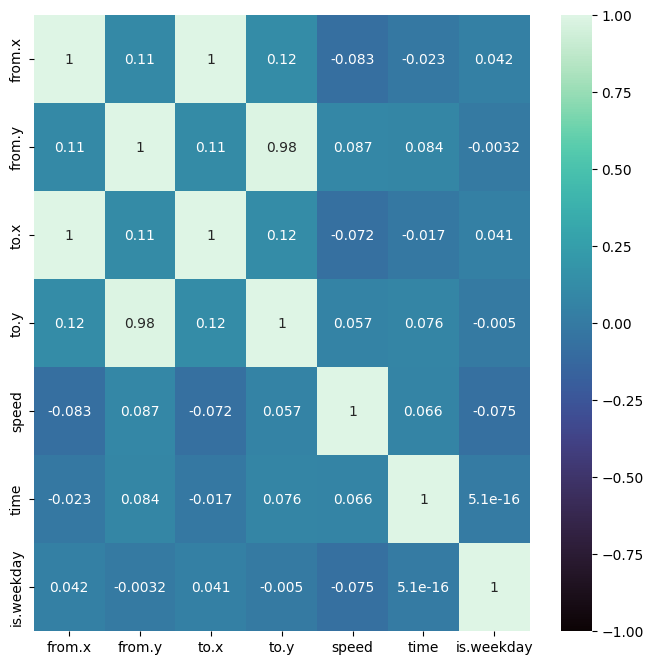

In [5]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, vmin=-1.0, cmap='mako')
plt.show()

### Preprocessing

In [6]:
df = data.copy()

In [7]:
df['time'].unique()

array([ 8, 14, 20])

In [8]:
# Split df into X and y
y = df['speed']
X = df.drop('speed', axis=1)

In [9]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [13]:
X_train.shape, X_test.shape

((399, 6), (171, 6))

In [12]:
y_train

11     28.033636
285    52.736325
430    47.225966
556    14.175614
58     33.340474
         ...    
129    16.850889
144    13.373810
72     23.649053
235    35.804771
37     10.198333
Name: speed, Length: 399, dtype: float64

In [14]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

### Training / Model Selection

In [15]:
models = {
    "                     Linear Regression": LinearRegression(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}

In [16]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name+" trained.")

                     Linear Regression trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.


### Results

In [17]:
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))

                     Linear Regression R^2 Score: 0.00029
                   K-Nearest Neighbors R^2 Score: 0.11157
                        Neural Network R^2 Score: -0.18079
Support Vector Machine (Linear Kernel) R^2 Score: -0.02482
   Support Vector Machine (RBF Kernel) R^2 Score: 0.06563
                         Decision Tree R^2 Score: 0.42271
                         Random Forest R^2 Score: 0.60589
                     Gradient Boosting R^2 Score: 0.48386


In [18]:
### Results Without Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name+" trained.")

for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))

                     Linear Regression trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                     Linear Regression R^2 Score: 0.00029
                   K-Nearest Neighbors R^2 Score: 0.09804
                        Neural Network R^2 Score: -0.00373
Support Vector Machine (Linear Kernel) R^2 Score: -0.06575
   Support Vector Machine (RBF Kernel) R^2 Score: -0.01027
                         Decision Tree R^2 Score: 0.39040
                         Random Forest R^2 Score: 0.62931
                     Gradient Boosting R^2 Score: 0.47032
